In [21]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [22]:
# SQLiteデータベースへの接続
path = '/Users/matsumotohikari/ds2/finalwork/git-finalwork/'
db_name_whether = 'whether_db.sqlite'
db_name_step = 'step_db.sqlite'
con_whether = sqlite3.connect(path + db_name_whether)
con_step = sqlite3.connect(path + db_name_step)

In [23]:
whether ='SELECT * FROM tem;'
step = 'SELECT * FROM STEP;'

df_whether = pd.read_sql_query(whether, con_whether)
df_step = pd.read_sql_query(step, con_step)

In [24]:
print(df_whether)
print(df_step)

    temperature
0           7.3
1           6.5
2           7.1
3          10.8
4           5.9
5           3.8
6           3.4
7           4.6
8           3.3
9           1.5
10          0.1
11          2.0
12          1.0
13          2.6
14          4.3
15          4.4
16          2.2
17          4.4
18          5.8
          date     step
0   2023/12/13   8732.0
1   2023/12/14   8654.0
2   2023/12/15   8931.0
3   2023/12/16   6949.0
4   2023/12/17   5719.0
5   2023/12/18   8520.0
6   2023/12/19  15097.0
7   2023/12/20   8069.0
8   2023/12/21  14321.0
9   2023/12/22  10325.0
10  2023/12/23  14908.0
11  2023/12/24   9996.0
12  2023/12/25  10024.0
13  2023/12/26  12311.0
14  2023/12/27  10343.0
15  2023/12/28   3705.0
16  2023/12/29   5748.0
17  2023/12/30   5866.0
18  2023/12/31   7729.0


In [25]:
print("df_whether columns:", df_whether.columns)
print("df_step columns:", df_step.columns)

df_whether columns: Index(['temperature'], dtype='object')
df_step columns: Index(['date', 'step'], dtype='object')


In [26]:
# 列方向に結合
merged_df = pd.concat([df_step, df_whether], axis=1)
# 結合結果の表示
print(merged_df)

          date     step  temperature
0   2023/12/13   8732.0          7.3
1   2023/12/14   8654.0          6.5
2   2023/12/15   8931.0          7.1
3   2023/12/16   6949.0         10.8
4   2023/12/17   5719.0          5.9
5   2023/12/18   8520.0          3.8
6   2023/12/19  15097.0          3.4
7   2023/12/20   8069.0          4.6
8   2023/12/21  14321.0          3.3
9   2023/12/22  10325.0          1.5
10  2023/12/23  14908.0          0.1
11  2023/12/24   9996.0          2.0
12  2023/12/25  10024.0          1.0
13  2023/12/26  12311.0          2.6
14  2023/12/27  10343.0          4.3
15  2023/12/28   3705.0          4.4
16  2023/12/29   5748.0          2.2
17  2023/12/30   5866.0          4.4
18  2023/12/31   7729.0          5.8


In [27]:
# 'temperature' 列を基準に昇順（低い順）に並べ替え
sorted_df = merged_df.sort_values(by='temperature')

# 結果の表示
print(sorted_df)

          date     step  temperature
10  2023/12/23  14908.0          0.1
12  2023/12/25  10024.0          1.0
9   2023/12/22  10325.0          1.5
11  2023/12/24   9996.0          2.0
16  2023/12/29   5748.0          2.2
13  2023/12/26  12311.0          2.6
8   2023/12/21  14321.0          3.3
6   2023/12/19  15097.0          3.4
5   2023/12/18   8520.0          3.8
14  2023/12/27  10343.0          4.3
15  2023/12/28   3705.0          4.4
17  2023/12/30   5866.0          4.4
7   2023/12/20   8069.0          4.6
18  2023/12/31   7729.0          5.8
4   2023/12/17   5719.0          5.9
1   2023/12/14   8654.0          6.5
2   2023/12/15   8931.0          7.1
0   2023/12/13   8732.0          7.3
3   2023/12/16   6949.0         10.8


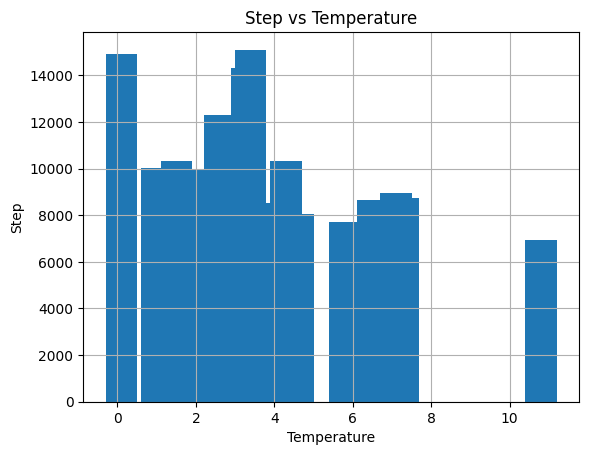

In [28]:
# 棒グラフの描画
plt.bar(sorted_df['temperature'], sorted_df['step'])

# 軸ラベルの設定
plt.xlabel('Temperature')
plt.ylabel('Step')

# グラフのタイトル設定
plt.title('Step vs Temperature')

# グリッドの表示（任意）
plt.grid(True)

# グラフの表示
plt.show()